In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Downloads/ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
data['class'] = [1 if each == 'Abnormal' else 0 for each in data['class']]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [4]:
y = data['class'].values
x_data = data.drop(['class'], axis = 1)

In [5]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [7]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

print("Rastgele orman modeli Test Doğruluğu: {}".format(rf.score(x_test, y_test)))

Rastgele orman modeli Test Doğruluğu: 0.7741935483870968


In [14]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm =confusion_matrix(y_test, y_pred)
cm

array([[ 31,  55],
       [  4, 174]], dtype=int64)

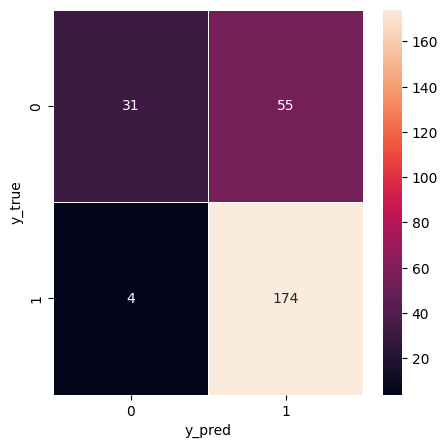

In [18]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5,
           linecolor = "white", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()